In [126]:
import numpy as np
import pandas as pd
import array
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
# for wav
from scipy.io.wavfile import read, write
# for time - frequency analysis
from scipy.fft import fft, fftfreq, ifft, rfft, rfftfreq, irfft
from scipy.signal import stft

### Trying with .wav

In [26]:
sample_rate, data = read("music/101-igor_levit-piano_sonata_no._1_in_f_minor_op._2_no.1_i._allegro-noir.wav")
print(f"number of channels = {data.shape[1]}")

number of channels = 2


In [16]:
# sampling period in seconds
T = 1/sample_rate 
print(T)

2.2675736961451248e-05


In [21]:
# number of sampled points
sampling_points = len(data)
print(sampling_points)

9785496


In [27]:
# length of the audio clip in seconds
length = sampling_points*T
print(length)

221.89333333333335


In [ ]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.figure(figsize=(16,9))
plt.show()

In [65]:
data_frequency = fft(data[:fs,0])

In [66]:
freqs = fftfreq(fs, T)

In [92]:
fft_df = pd.DataFrame({'freq': freqs, 'fft': 2.0/fs *np.abs(data_frequency)})

In [93]:
mask_important_freq = np.abs(fft_df['freq']) < 200

In [94]:
fft_df = fft_df[mask_important_freq]

In [98]:
first_sec = ifft(fft_df)

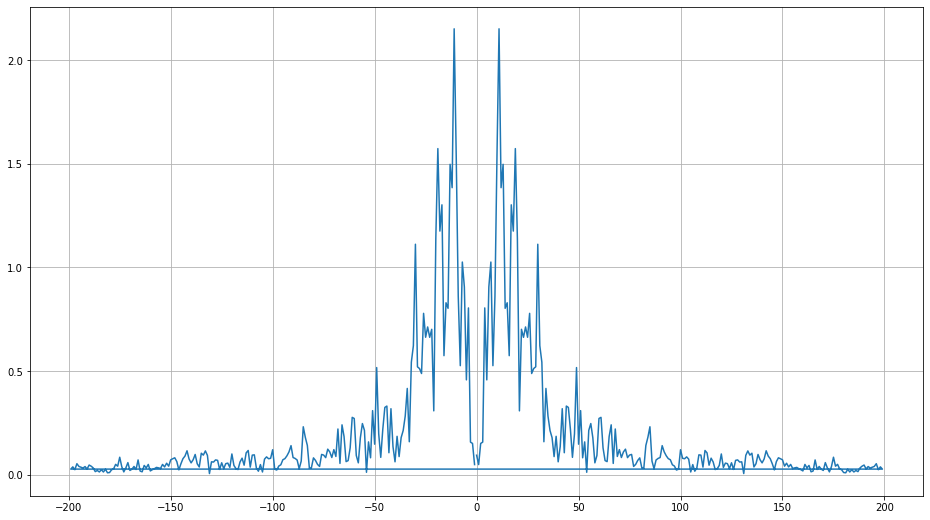

In [95]:
plt.figure(figsize=(16,9))
plt.plot(fft_df['freq'], fft_df['fft'])
plt.grid()
plt.show()

In [102]:
channel_1 = data[:,0]
channel_2 = data[:,1]

In [106]:
len(channel_1)/222

44078.81081081081

In [128]:
sstft = stft(channel_1, fs, nperseg=fs)

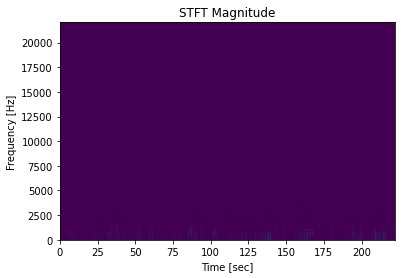

In [139]:
f, t, Zxx = stft(channel_1, fs, nperseg=100)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()